In [2]:
import sys
import os

sys.path.append(os.path.join(os.getcwd(), "packages"))
import getimage
import improcess
from numpy import *
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import imageio
from scipy import signal

## Input Data Set

get_image_date_range() function fetches 8 raw images from data source and we will try to extract night time light information from those 8 frame of images

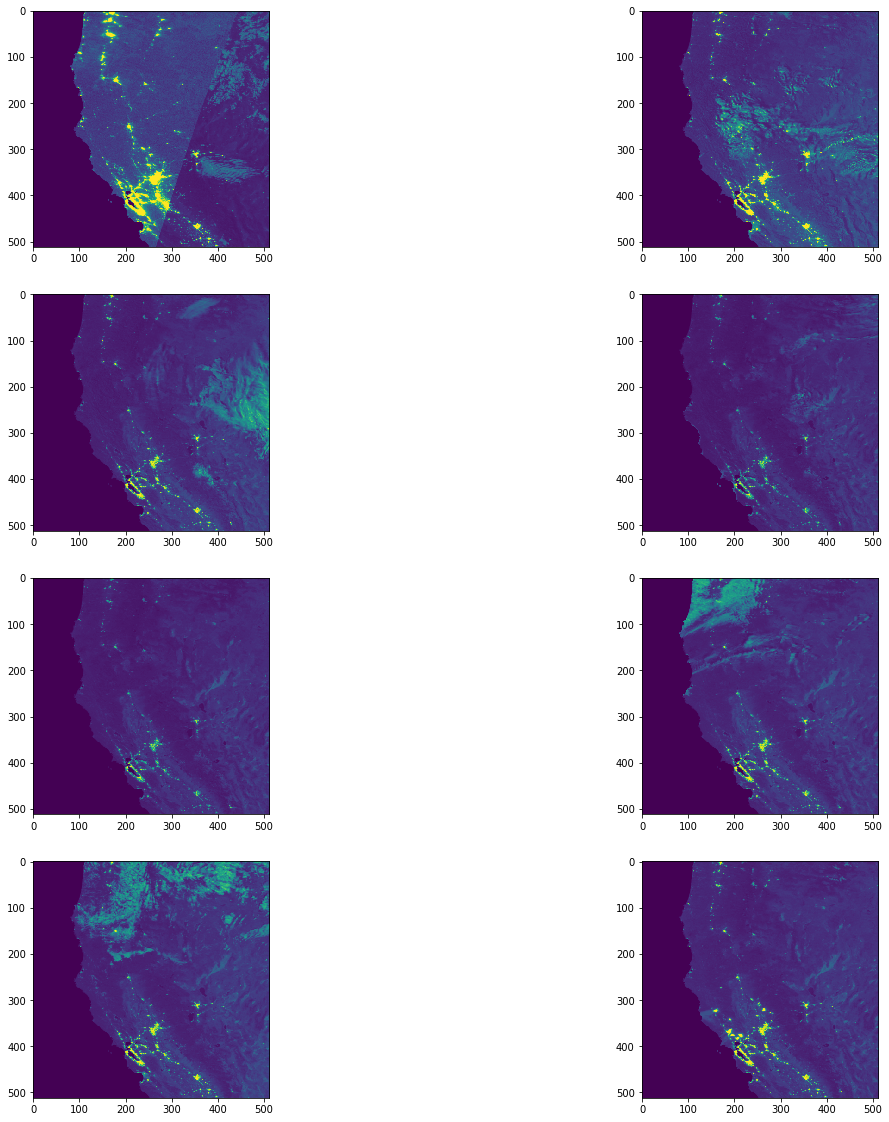

In [3]:
l = getimage.get_image_date_range(num_days=31)
fig=plt.figure(figsize=(20,20))
columns = 2
rows = 4
for i in range(1, columns*rows +1):
    img = l[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

## Only with Averaging 

First we will try to take the average of all input images to recover regions that are lost in a single image frame

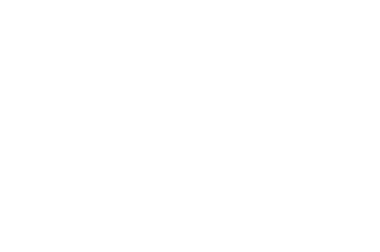

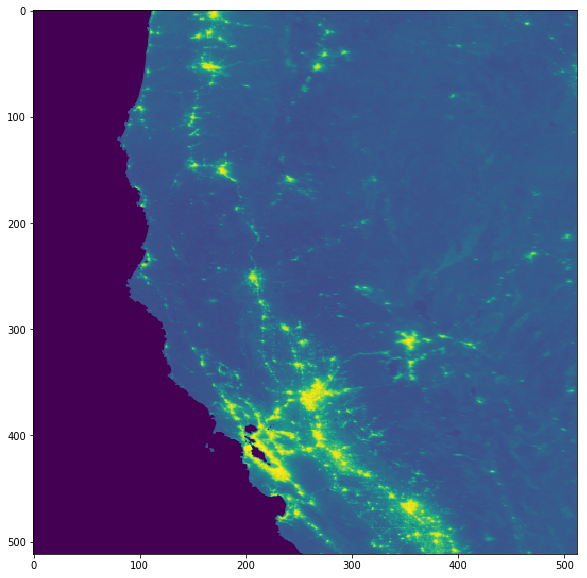

In [4]:
l = getimage.get_image_date_range(num_days=31)

plt.axis('off')

w,h=l[0].shape
arr=zeros((h,w),float)
N=len(l)



for im in l:
    imarr=array(im,dtype=float)
    arr=arr+imarr/N
    out = matrix.round(arr)
fig=plt.figure(figsize=(10,10))
plt.imshow(out)    

## Added Wiener Filter to Denoise

Added adaptive filter to suppress noise from averaging

C:\Users\david\Anaconda2\lib\site-packages\scipy\signal\signaltools.py:928: RuntimeWarning: divide by zero encountered in true_divide
  res *= (1 - noise / lVar)
C:\Users\david\Anaconda2\lib\site-packages\scipy\signal\signaltools.py:928: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)


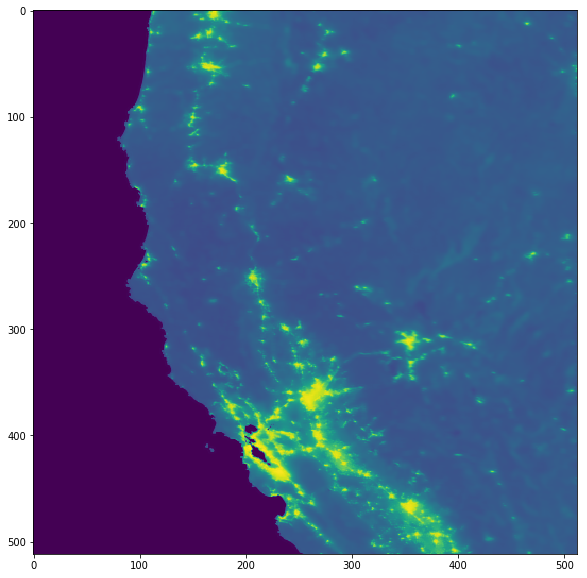

In [5]:
after_wiener=signal.wiener(out,5)
fig=plt.figure(figsize=(10,10))
plt.imshow(after_wiener)   

## Intensity Level Slicing

Different features of images are in different grey levels, we can extract the night flare component and suppress other features such as cloud residual by using intensity level slicing 

Sample cloud pixel intensity as a reference for the cloud feature

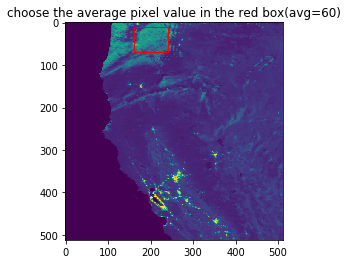

In [6]:
import matplotlib.patches as patches
from PIL import Image

im=l[6]
fig,ax = plt.subplots(1)
ax.imshow(im)
rect = patches.Rectangle((160,10),80,60,linewidth=1,edgecolor='r',facecolor='none')


ax.add_patch(rect)
plt.title('choose the average pixel value in the red box(avg=60)')
plt.show()



## Final Result

## Band Reject filter (smooth but not with high contrast)

Took the shape of intensity slicing transfer function but with curvy transitions 

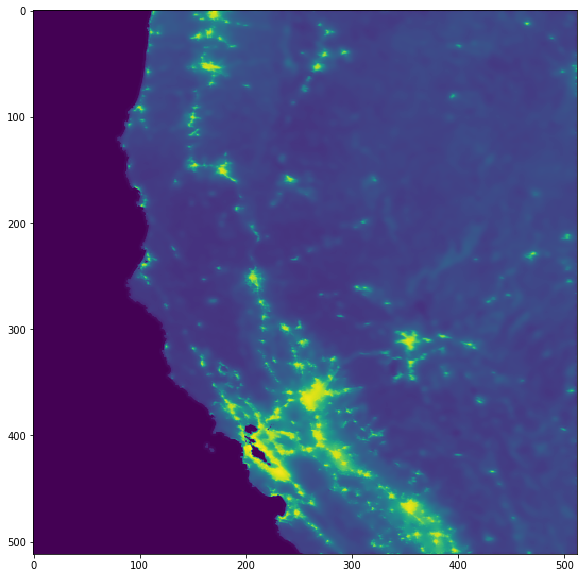

In [7]:
pp=improcess.get_processed_image_band_reject()
fig=plt.figure(figsize=(10,10))
plt.imshow(pp)

## Intensity Slicing (high contrast but has clipping)

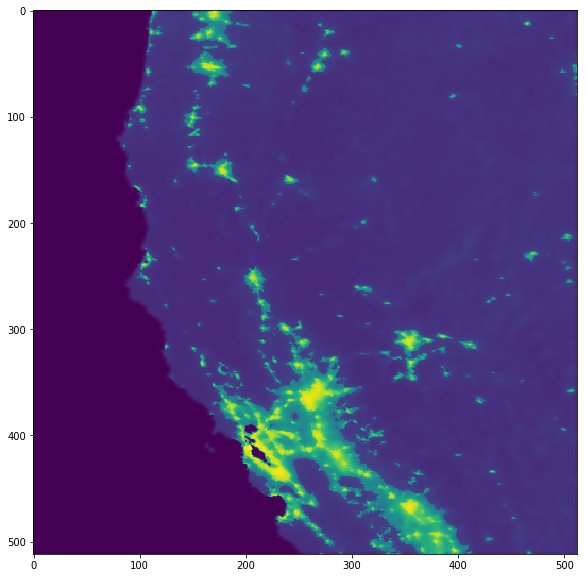

In [8]:
pp1=improcess.get_processed_image_clip()
fig=plt.figure(figsize=(10,10))
plt.imshow(pp1)